In [206]:
import numpy as np

def momento(v, x, n=0):

    x_mean = np.mean(x, 0, keepdims=True)
    b = x - x_mean
    
    N = x.shape[0]

    mu = [ ]

    for i in range(N):
        
        bn = np.array(1)
        
        vi = v[i, None]        
        bi = b[i, None]

        for j in range(n):
            bn = np.outer(bi, bn)

        m = vi*bn
        mu.append(m)

    mu = np.array(mu)
    mu = np.sum(mu, 0)

    return mu 

In [207]:
import os
import pandas as pd 

data_path = os.path.join('.','datos','datosmasas.csv')

dt = pd.read_csv(data_path, index_col=0)
dt.head()

,masas,x,y,z
particula,,,,
1,2.0,-53.0,79.0,-91.0
2,2.0,13.0,-142.0,-177.0
3,2.0,-109.0,-103.0,-120.0
4,2.0,4.0,-96.0,110.0
5,4.0,222.0,-22.0,-236.0


In [209]:
import matplotlib.pyplot as plt 

masas = np.array(dt['masas'])
masas = masas[:, None]

x = np.array(dt['x'])
y = np.array(dt['y'])


# x = x[ ..., None]
print(x.shape)
# plt.scatter(cx,cy)

(1533,)


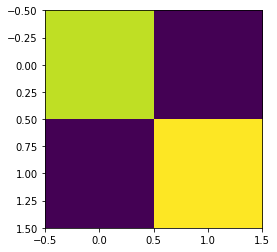

In [210]:
_input = np.stack([x,y], 1)
moment = momento( masas, _input, n=2)

plt.imshow(moment / x.shape[0])

In [211]:
x.shape

(1533,)

In [212]:
print(moment)

[[9.58603863e+08 9.11766544e+08]
 [9.11766544e+08 9.63665233e+08]]


<AxesSubplot:xlabel='x', ylabel='y'>

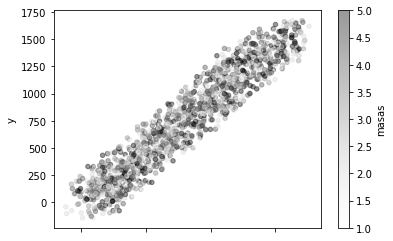

In [213]:
dt.plot.scatter(x='x', y='y', c='masas', alpha=0.4)
# plt.scatter(moment[0], moment[1])